# Intro
My data analysis will explore the trends of Texas Lottery Prize Winners

# Import

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import warnings; warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/tgut03/Jupyter/Data/Texas Lottery Prize Winners.csv")
pd.set_option("display.max_columns", None)
df.head(3)

,Row ID,Claim Number,Amount Won,Date Claim Paid,Player ID,Annuity Indicator,Anonymous Indicator,Claim Center Location,Claim Type,US Citizen Flag,Last Name,First Name,Claimant Name and Player ID,Claimant City,Claimant State,Claimant County,Claimant Country,Prize or Merchandise Indicator,Scratch Ticket or Draw Game,Date of Draw,Draw Time of Day,Prize Level,Date Ticket Sold,Scratch Ticket Game Number,Scratch Ticket Cost,Retailer Number,Retailer Name,Retailer Number and Name,Retailer Address 1,Retailer Address 2,Retailer City,Retailer State,Retailer Zip Code,Retailer Zip Code +4,Retailer County
0,I-22040583050-163900270,22040583050,30.0,06/06/2022,102314082,No,No,Austin Super User,Individual,Yes,GONZALEZ,LISSETTE,"GONZALEZ, LISSETTE (102314082)",Grand Rapids,MI,Kent,United States,Prize,Scratch Tickets,NaN,NaN,NaN,NaN,2258.0,10.0,188732.0,TRISTAR #10,188732 - TRISTAR #10,2041 S INTERSTATE 35,STE 104,San Marcos,TX,78666.0,NaN,Hays
1,I-22052612091-164618770,22052612091,20.0,06/06/2022,102314068,No,No,Austin Super User,Individual,Not Provided,TORRES,ROSE,"TORRES, ROSE (102314068)",San Antonio,TX,Bexar,United States,Prize,Scratch Tickets,NaN,NaN,NaN,NaN,1838.0,20.0,190174.0,7 DAY CORNER STORE,190174 - 7 DAY CORNER STORE,3103 W MARTIN,NaN,San Antonio,TX,78207.0,NaN,Bexar
2,I-22052612091-164618772,22052612091,20.0,06/06/2022,102314068,No,No,Austin Super User,Individual,Not Provided,TORRES,ROSE,"TORRES, ROSE (102314068)",San Antonio,TX,Bexar,United States,Prize,Scratch Tickets,NaN,NaN,NaN,NaN,2354.0,20.0,151047.0,FUEL STATION 4,151047 - FUEL STATION 4,2100 NW MILITARY HWY,NaN,Castle Hills,TX,78213.0,NaN,Bexar


In [3]:
dfInfo = pd.DataFrame()
dfInfo["Type"] = df.dtypes
dfInfo["Nulls"] = df.isnull().sum()
dfInfo["Uniques"] = df.nunique()
print(dfInfo)
print(df.shape)

                                   Type    Nulls  Uniques
Row ID                           object        0  2526782
Claim Number                      int64        0  1709122
Amount Won                      float64        0     8291
Date Claim Paid                  object        0     7701
Player ID                         int64        0   987213
Annuity Indicator                object        0        2
Anonymous Indicator              object        0        2
Claim Center Location            object        0       18
Claim Type                       object        0        2
US Citizen Flag                  object        0        3
Last Name                        object      100   130932
First Name                       object      908    57595
Claimant Name and Player ID      object        0   987213
Claimant City                    object       68    14348
Claimant State                   object     1947      103
Claimant County                  object  1015953     1777
Claimant Count

# Transform

In [4]:
# Remove Cols
extra = ["Claim Number",
             "Date Claim Paid",
             "Player ID",
             "Claim Center Location",
             "Claimant Name and Player ID",
             "Scratch Ticket Game Number",
             "Retailer Address 2",
             "Scratch Ticket Game Number",
             "Retailer Number",
             "Retailer Number and Name",
             "Retailer Zip Code +4"]
df.drop(extra, axis = 1, inplace = True)

In [5]:
# Convert Data Types
df["Date of Draw"] = pd.to_datetime(df["Date of Draw"]).dt.date
df["Date Ticket Sold"] = pd.to_datetime(df["Date Ticket Sold"]).dt.date
df["Amount Won"] = df["Amount Won"].astype(int)

In [6]:
# Date Year
df["Year of Draw"] = pd.to_datetime(df["Date of Draw"]).dt.year
df["Year of Sell"] = pd.to_datetime(df["Date Ticket Sold"]).dt.year

In [7]:
# Date Month
df["Month of Draw"] = pd.to_datetime(df["Date of Draw"]).dt.month
df["Month of Sell"] = pd.to_datetime(df["Date Ticket Sold"]).dt.month

In [8]:
# Date Day
df["Day of Draw"] = pd.to_datetime(df["Date of Draw"]).dt.day_name()
df["Day of Sell"] = pd.to_datetime(df["Date Ticket Sold"]).dt.day_name()

In [9]:
# Split String By Characters
df["Draw Time of Day"] = df["Draw Time of Day"].str[2:]

# Frequency

In [10]:
# Frequency Function
def freq(df, col) :
    x = df[col]
    freq = x.value_counts()
    relFreq = x.value_counts() / len(x)
    y = pd.concat([freq, relFreq], axis = 1)
    return y

In [11]:
# Annuity Frequency
freq(df, "Annuity Indicator")

,Annuity Indicator,Annuity Indicator
No,2526256,0.999792
Yes,526,0.000208


In [12]:
# Anonymous Frequency
freq(df, "Anonymous Indicator")

,Anonymous Indicator,Anonymous Indicator
No,2526278,0.999801
Yes,504,0.000199


In [13]:
# Prize/Merchandise Frequency
freq(df, "Prize or Merchandise Indicator")

,Prize or Merchandise Indicator,Prize or Merchandise Indicator
Prize,2516435,0.995905
Merchandise,10347,0.004095


In [14]:
# Claim Type Frequency
freq(df, "Claim Type")

,Claim Type,Claim Type
Individual,2525686,0.999566
Entity,1096,0.000434


In [15]:
# US Citizen Frequency
freq(df, "US Citizen Flag")

,US Citizen Flag,US Citizen Flag
Yes,2195448,0.868871
Not Provided,314909,0.124628
No,16425,0.006500


In [16]:
# Claimant Country Frequency
freq(df, "Claimant Country").head(10)

,Claimant Country,Claimant Country
United States,2522518,0.998312
Mexico,1645,0.000651
Canada,526,0.000208
Puerto Rico,57,0.000023
Virgin Islands (U.S.),15,0.000006
Virgin Islands,10,0.000004
Bahamas,9,0.000004
Thailand,7,0.000003
Great Britain (United Kingdom),7,0.000003
Australia,7,0.000003


In [17]:
# Claimant State Frequency
freq(df, "Claimant State").head(10)

,Claimant State,Claimant State
TX,2195192,0.868770
OK,62557,0.024758
AR,23662,0.009364
LA,19718,0.007804
CA,17206,0.006809
FL,16075,0.006362
AL,14413,0.005704
CO,10345,0.004094
NM,10030,0.003969
GA,9648,0.003818


In [18]:
# Claimant City Frequency
freq(df, "Claimant City").head(10)

,Claimant City,Claimant City
Houston,247206,0.097834
San Antonio,151304,0.059880
Dallas,94249,0.037300
Corpus Christi,92827,0.036737
Austin,70837,0.028034
Lubbock,57672,0.022824
Amarillo,57119,0.022605
El Paso,54865,0.021713
Fort Worth,54288,0.021485
Laredo,25471,0.010080


In [19]:
# Claimant County Frequency
freq(df, "Claimant County").head(10)

,Claimant County,Claimant County
Harris,205950,0.081507
Dallas,115269,0.045619
Bexar,106710,0.042232
Tarrant,75632,0.029932
Nueces,70346,0.027840
Travis,47885,0.018951
El Paso,39953,0.015812
Fort Bend,35097,0.013890
Randall,26254,0.010390
Collin,24572,0.009725


In [20]:
# Retailer Frequency
freq(df, "Retailer Name").head(10)

,Retailer Name,Retailer Name
Unknown,1027737,0.406738
ZEKE'S PUEBLO MEXICANO INC,8976,0.003552
COLONIES FOOD MART,8456,0.003347
WINNERS CORNER TX LLC,4069,0.001610
EZ MART 248,4046,0.001601
LEOPARD FOOD MART,3564,0.001410
CHALU'S PRODUCE AND MEAT MARKET,2790,0.001104
STRIPES 2101,2346,0.000928
CHEVRON FOOD MART,2138,0.000846
TOOT'N TOTUM 61,2098,0.000830


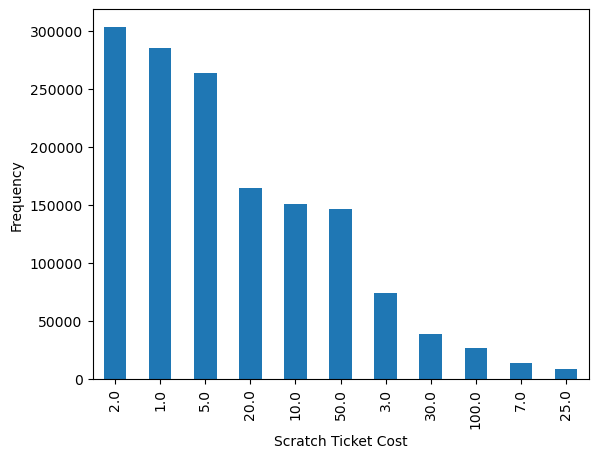

In [21]:
# Scratch Cost Frequency
df["Scratch Ticket Cost"].value_counts().plot(kind = "bar")
plt.xlabel("Scratch Ticket Cost")
plt.ylabel("Frequency")
plt.show()

In [22]:
# Scratch/Draw Frequency
freq(df, "Scratch Ticket or Draw Game")

,Scratch Ticket or Draw Game,Scratch Ticket or Draw Game
Scratch Tickets,1475575,0.583974
Lotto Texas®,232354,0.091956
Cash Five®,218230,0.086367
Daily 4™,197521,0.078171
Pick 3™,163310,0.064632
Mega Millions®,152074,0.060185
Texas Two Step®,37620,0.014889
Powerball®,34750,0.013753
All or Nothing™,11696,0.004629
Texas Triple Chance™,2370,0.000938


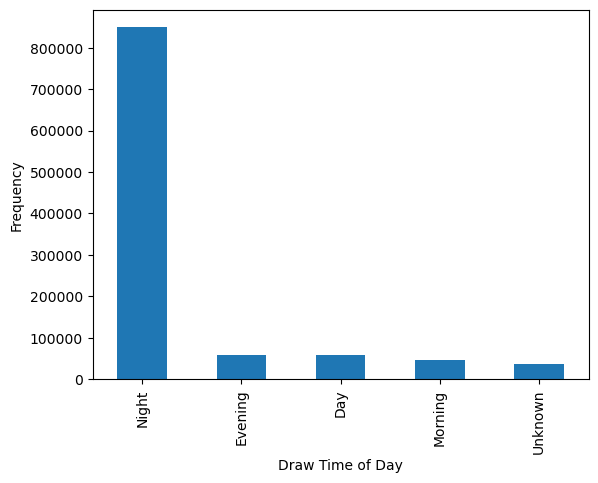

In [23]:
# Draw Time Frequency
df["Draw Time of Day"].value_counts().plot(kind = "bar")
plt.xlabel("Draw Time of Day")
plt.ylabel("Frequency")
plt.show()

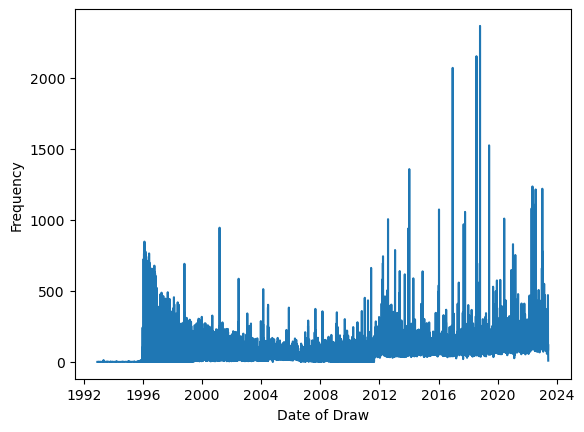

In [24]:
# Draw Date Frequency
df["Date of Draw"].value_counts().plot(kind = "line")
plt.xlabel("Date of Draw")
plt.ylabel("Frequency")
plt.show()

In [25]:
# Draw Year Frequency
freq(df, "Year of Draw")

,Year of Draw,Year of Draw
2022.0,60958,0.024125
2021.0,51819,0.020508
1997.0,46931,0.018573
2018.0,45719,0.018094
1996.0,45406,0.017970
2020.0,44628,0.017662
2019.0,42650,0.016879
1998.0,39728,0.015723
2012.0,39004,0.015436
2016.0,38648,0.015295


In [26]:
# Draw Month Frequency
freq(df, "Month of Draw")

,Month of Draw,Month of Draw
3.0,86321,0.034162
1.0,85361,0.033782
5.0,81280,0.032167
10.0,78026,0.030880
12.0,76623,0.030324
4.0,76021,0.030086
7.0,74656,0.029546
2.0,73944,0.029264
6.0,73562,0.029113
9.0,72014,0.028500


In [27]:
# Draw Day Frequency
freq(df, "Day of Draw")

,Day of Draw,Day of Draw
Friday,176501,0.069852
Tuesday,173013,0.068472
Saturday,172819,0.068395
Wednesday,171310,0.067798
Monday,114067,0.045143
Thursday,107576,0.042574
Sunday,1014,0.000401


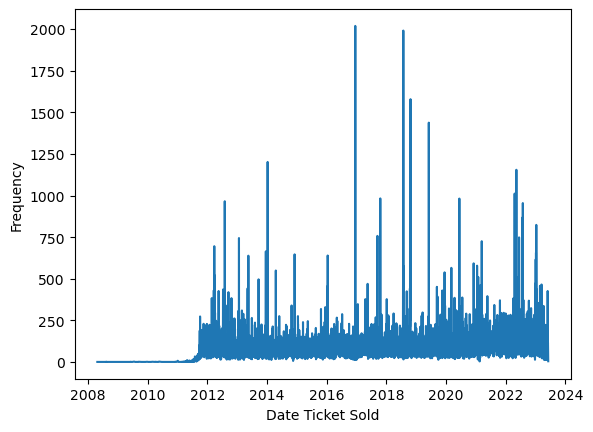

In [28]:
# Sell Date Frequency
df["Date Ticket Sold"].value_counts().plot(kind = "line")
plt.xlabel("Date Ticket Sold")
plt.ylabel("Frequency")
plt.show()

In [29]:
# Sell Year Frequency
freq(df, "Year of Sell")

,Year of Sell,Year of Sell
2022.0,61267,0.024247
2021.0,52050,0.020599
2018.0,45935,0.018179
2020.0,45017,0.017816
2019.0,42799,0.016938
2012.0,39176,0.015504
2016.0,38739,0.015331
2017.0,38309,0.015161
2013.0,36166,0.014313
2014.0,35512,0.014054


In [30]:
# Sell Month Frequency
freq(df, "Month of Sell")

,Month of Sell,Month of Sell
1.0,48447,0.019173
5.0,47159,0.018664
12.0,45566,0.018033
3.0,45145,0.017867
10.0,43940,0.017390
7.0,42502,0.016821
4.0,41443,0.016401
6.0,39636,0.015686
9.0,38887,0.015390
11.0,38652,0.015297


In [31]:
# Sell Day Frequency
freq(df, "Day of Sell")

,Day of Sell,Day of Sell
Friday,100434,0.039748
Tuesday,86661,0.034297
Wednesday,78828,0.031197
Saturday,75509,0.029883
Monday,70860,0.028044
Thursday,68111,0.026956
Sunday,24681,0.009768


# Summary

In [32]:
# Summary Function
def summary(col) :
    x = col.describe().astype(int)
    return x

In [33]:
# Amount Won Summary
summary(df["Amount Won"])

count      2526782
mean          5027
std         300563
min              0
25%              5
50%            600
75%           1000
max      157091592
Name: Amount Won, dtype: int64

In [34]:
# Amount Won Summary By Annuity
summary(df.groupby("Annuity Indicator")["Amount Won"])

,count,mean,std,min,25%,50%,75%,max
Annuity Indicator,,,,,,,,
No,2526256,3371,214650,0,5,600,1000,157091592
Yes,526,7956876,12235867,2,1040000,4000000,9355124,144000000


In [35]:
# Amount Won Summary By Anonymous
summary(df.groupby("Anonymous Indicator")["Amount Won"])

,count,mean,std,min,25%,50%,75%,max
Anonymous Indicator,,,,,,,,
No,2526278,4557,278716,0,5,600,1000,144000000
Yes,504,2359544,7622016,2,1000000,1000000,2000000,157091592


In [36]:
# Amount Won Summary By Prize/Merchandise
summary(df.groupby("Prize or Merchandise Indicator")["Amount Won"])

,count,mean,std,min,25%,50%,75%,max
Prize or Merchandise Indicator,,,,,,,,
Merchandise,10347,8434,21206,6,560,595,13156,1000000
Prize,2516435,5013,301177,0,5,600,1000,157091592


In [37]:
# Amount Won Summary By Claim Type
summary(df.groupby("Claim Type")["Amount Won"])

,count,mean,std,min,25%,50%,75%,max
Claim Type,,,,,,,,
Entity,1096,3322958,9463074,1,5,1000,1762500,128000000
Individual,2525686,3587,216273,0,5,600,1000,157091592


In [38]:
# Amount Won Summary By US Citizen
summary(df.groupby("US Citizen Flag")["Amount Won"])

,count,mean,std,min,25%,50%,75%,max
US Citizen Flag,,,,,,,,
No,16425,10791,417230,1,629,1000,1000,42801674
Not Provided,314909,9,717,1,2,4,7,300000
Yes,2195448,5703,320414,0,10,697,1000,157091592


In [39]:
# Amount Won Summary By Scratch Cost
summary(df.groupby("Scratch Ticket Cost")["Amount Won"])

,count,mean,std,min,25%,50%,75%,max
Scratch Ticket Cost,,,,,,,,
1.0,285749,291,6346,1,1,2,5,1040000
2.0,303741,1121,22354,1,2,4,50,2400000
3.0,73898,1819,7062,3,3,5,500,100000
5.0,263501,2363,33258,0,10,20,1000,2600000
7.0,13639,2004,10805,7,10,20,700,177777
10.0,150858,4094,73823,5,20,1000,1000,5200000
20.0,164279,5593,85957,5,1000,1000,1000,7500000
25.0,8125,3580,36853,25,1000,1000,2000,1000000
30.0,38729,4800,82557,30,1000,1000,1000,3000000


In [40]:
# Amount Won Summary By Scratch/Draw
summary(df.groupby("Scratch Ticket or Draw Game")["Amount Won"])

,count,mean,std,min,25%,50%,75%,max
Scratch Ticket or Draw Game,,,,,,,,
All or Nothing™,11696,3321,28307,2,2,2,10,250000
Branded Draw Game,50,26812,140542,5,7,10000,10000,1000000
Cash Five®,218230,1453,6675,1,449,642,823,286757
Daily 4™,197521,2162,2537,3,600,2500,2700,125000
Lotto Texas®,232354,25608,705864,1,94,1384,1872,82569717
Mega Millions®,152074,8789,765004,1,3,200,600,157091592
Pick 3™,163310,722,748,3,500,660,660,14945
Powerball®,34750,14610,701177,2,4,4,12,127046150
Scratch Tickets,1475575,2471,64056,0,4,50,1000,20000000


In [41]:
# Amount Won Summary By Draw Year
summary(df.groupby("Year of Draw")["Amount Won"])

,count,mean,std,min,25%,50%,75%,max
Year of Draw,,,,,,,,
1992.0,7,7314670,6708512,3381501,3404622,3487841,7881658,21760794
1993.0,86,6223782,5826432,568,3471816,3941946,8415081,38647083
1994.0,60,11663782,11500471,580,4225128,8845389,15967517,53960459
1995.0,1112,522627,3024481,26,606,1316,1602,43503163
1996.0,45406,12790,447062,26,622,660,1172,46661981
1997.0,46931,9114,410264,26,642,865,1381,45000000
1998.0,39728,7516,371500,26,653,838,1332,47000000
1999.0,33598,4489,308189,3,646,839,1203,38000000
2000.0,30418,3962,183807,3,634,878,1194,19000000


In [42]:
# Amount Won Summary By Draw Month
summary(df.groupby("Month of Draw")["Amount Won"])

,count,mean,std,min,25%,50%,75%,max
Month of Draw,,,,,,,,
1.0,85361,7621,367408,1,47,615,1406,73572690
2.0,73944,9629,573684,1,83,628,1168,127046150
3.0,86321,7808,363642,1,54,614,1225,68208778
4.0,76021,6118,265898,1,40,620,1295,45014921
5.0,81280,9107,426740,1,56,619,1365,64765705
6.0,73562,8432,412459,1,40,631,1416,82569717
7.0,74656,7577,343958,1,16,614,1449,49918097
8.0,69901,7943,301794,1,25,625,1413,27788541
9.0,72014,9171,676947,1,30,634,1350,157091592


In [43]:
# Amount Won Summary By Draw Day
summary(df.groupby("Day of Draw")["Amount Won"])

,count,mean,std,min,25%,50%,75%,max
Day of Draw,,,,,,,,
Friday,176501,2831,158855,1,150,600,860,62060880
Monday,114067,2775,36797,1,290,660,1125,6889118
Saturday,172819,15311,527501,1,6,646,1820,82569717
Sunday,1014,1622,1935,3,660,908,2500,30000
Thursday,107576,2572,29046,1,479,682,1199,2150000
Tuesday,173013,4051,440537,1,100,600,800,157091592
Wednesday,171310,18034,656036,1,7,660,1897,127046150


In [44]:
# Amount Won Summary By Draw Time
summary(df.groupby("Draw Time of Day")["Amount Won"])

,count,mean,std,min,25%,50%,75%,max
Draw Time of Day,,,,,,,,
Day,58623,1634,5816,2,400,660,2600,250000
Evening,59517,1759,6863,2,400,675,2600,250000
Morning,45648,1628,6401,2,330,660,2600,250000
Night,849517,10289,511392,1,20,631,1313,157091592
Unknown,37902,1037,1263,2,580,660,900,50000


In [45]:
# Amount Won Summary By Sell Year
summary(df.groupby("Year of Sell")["Amount Won"])

,count,mean,std,min,25%,50%,75%,max
Year of Sell,,,,,,,,
2008.0,21,4,3,2,3,3,5,20
2009.0,37,4,8,2,3,3,3,52
2010.0,38,6,16,2,3,3,3,100
2011.0,11621,5438,270329,2,4,150,660,22446420
2012.0,39176,4872,211803,2,7,450,1200,24686336
2013.0,36166,6250,217248,1,7,450,1949,24906600
2014.0,35512,4886,191950,1,4,500,2000,24228956
2015.0,33321,7873,711068,1,3,500,1743,127046150
2016.0,38739,5553,214994,1,4,500,2266,32343234


In [46]:
# Amount Won Summary By Sell Month
summary(df.groupby("Month of Sell")["Amount Won"])

,count,mean,std,min,25%,50%,75%,max
Month of Sell,,,,,,,,
1.0,48447,4388,131228,1,8,500,1562,15019000
2.0,36682,7627,674735,1,8,500,1350,127046150
3.0,45145,3568,118466,1,7,500,1200,18784876
4.0,41443,2882,76581,1,10,500,1500,10877968
5.0,47159,5100,220931,1,10,500,1426,24906600
6.0,39636,4506,161260,1,10,500,1512,19241983
7.0,42502,3644,137555,1,7,500,1776,18866208
8.0,37025,3456,90270,1,8,500,1462,10749212
9.0,38887,8783,835004,1,7,500,1892,157091592


In [47]:
# Amount Won Summary By Sell Day
summary(df.groupby("Day of Sell")["Amount Won"])

,count,mean,std,min,25%,50%,75%,max
Day of Sell,,,,,,,,
Friday,100434,2686,76923,1,10,500,1200,12561542
Monday,70860,3026,55015,1,8,500,1353,6889118
Saturday,75509,5684,194059,1,5,500,1636,22688989
Sunday,24681,4553,177837,1,2,12,660,19241983
Thursday,68111,4626,183296,1,12,580,1631,24228956
Tuesday,86661,5475,556426,1,12,500,1200,157091592
Wednesday,78828,7387,513598,1,10,600,2500,127046150
